In [ ]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [ ]:
# loading the dataset
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target

In [ ]:
# Creating a DataFrame for inspection (optional)
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

In [ ]:
# checking the first 5 rows of the dataset to check how the data lookslike
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [ ]:
df['target'].unique()

array([0, 1, 2])

In [ ]:
df.shape

(178, 14)

In [ ]:
unique_classes, counts = np.unique(y, return_counts=True)
for cls, count in zip(unique_classes, counts):
    print("Class {}: {} samples".format(cls, count))


Class 0: 59 samples
Class 1: 71 samples
Class 2: 48 samples


# About Dataset
We can tell that the dataset has three classes 0,1,2 respectively.There are 13 features in the dataset and there are 178 rows in the dataset. Class 0 has 59 samples , Class 1 has 71 Samples and Class 2 has 48 samples.

In [ ]:
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


There are no null values in the dataste in each column

<Axes: >

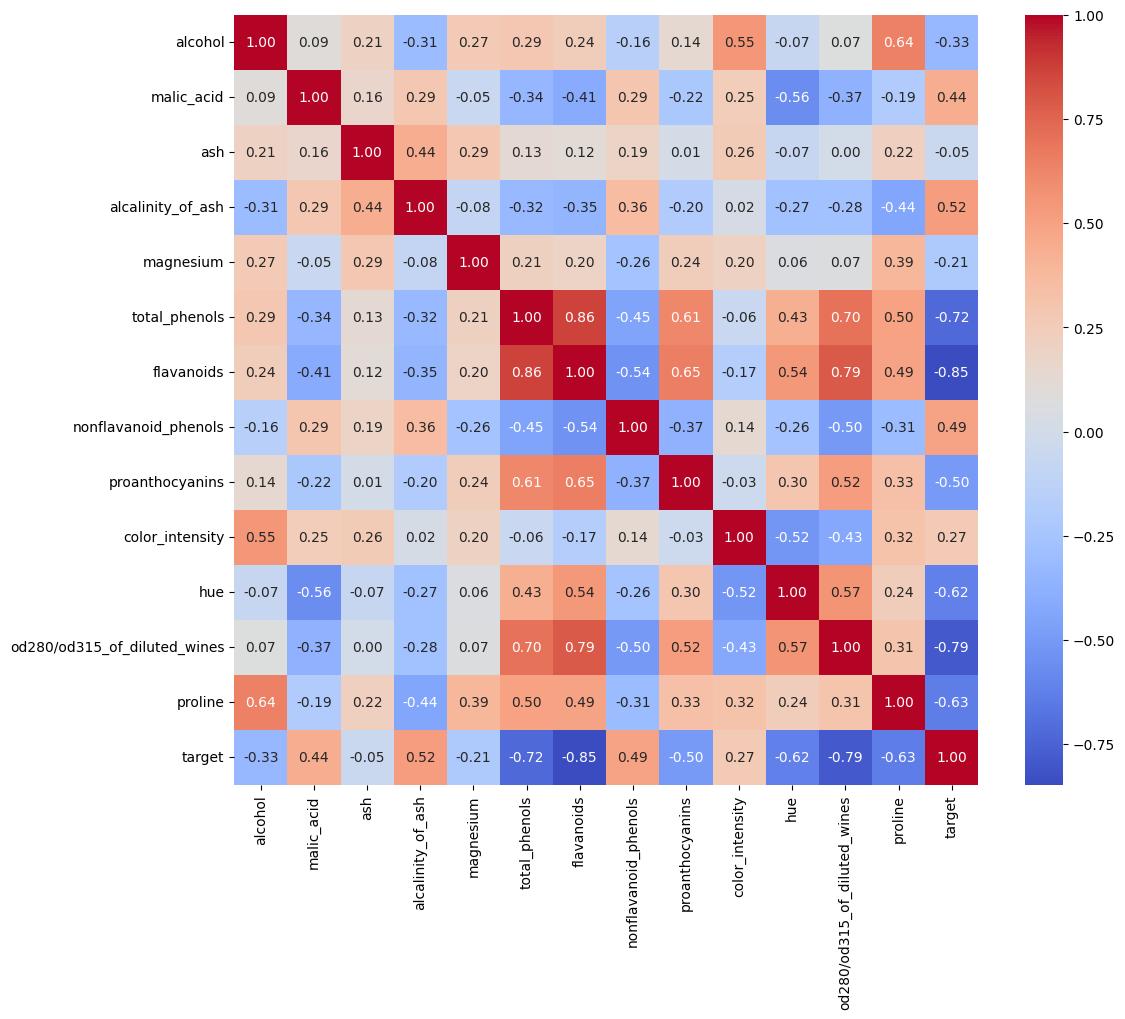

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')



# flavanoids and total_phenols are highly correlated, similarly there are other features as well which are highly positively correlated or negatively correlated

In [ ]:
df.describe() # This gives the statistics about our dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


**Dimensionality Reduction using PCA**

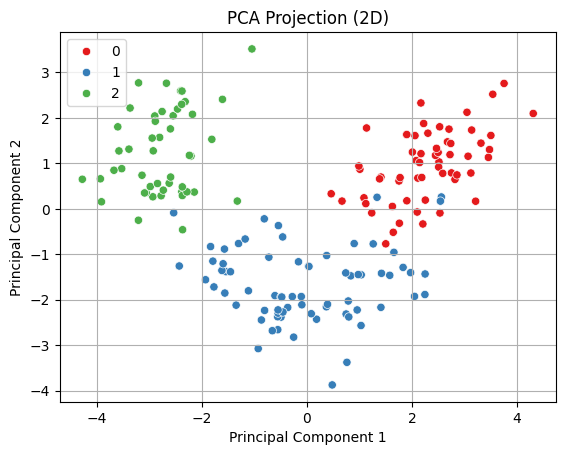

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features such that our output is not affected by the different ranges of the features. This leads to all features have zero mean and unit variance.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA I have kept the number of components as 2 so that it is easy to visualise.
# Doing this we reduce our dimensionality from 13 to 2 but that might not be optimal
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the results
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title("PCA Projection (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


**Applying Elbow Method to Find the optimal number of components**

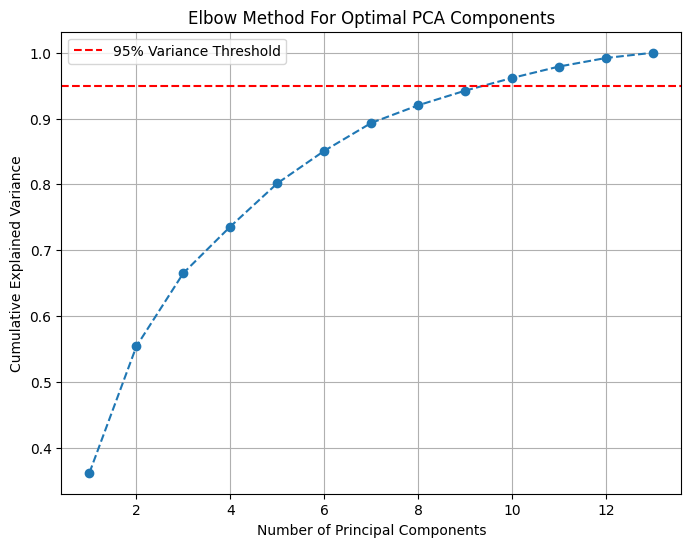

In [ ]:
# Applying PCA with all components
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

# Getting the cumulative explained variance
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method For Optimal PCA Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.show()

Since 9 features are enough to explain about 95% variance in the dataset we can take the optimal components as 9.

In [ ]:
pca = PCA(n_components=9)
X_pca_9 = pca.fit_transform(X_scaled)

print("New shape after PCA:", X_pca_9.shape)

New shape after PCA: (178, 9)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Doing the Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca_9, y, test_size=0.2, random_state=42)

# Defining different classifiers
classifiers = {
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

# Evaluating each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 {name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))



🔹 SVM Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


🔹 Naive Bayes Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


🔹 LDA Accuracy: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
 

<ipython-input-26-1019277158>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


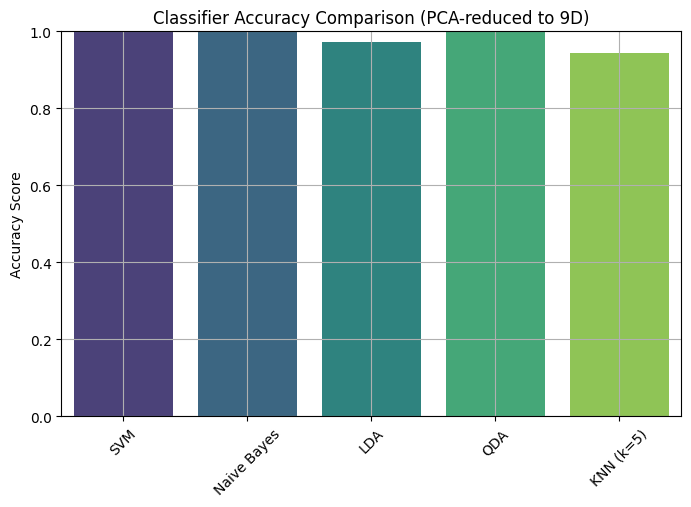

In [ ]:
# Storing the accuracy results
results = {}
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

# Plotting the  accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Classifier Accuracy Comparison (PCA-reduced to 9D)")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<Figure size 400x400 with 0 Axes>

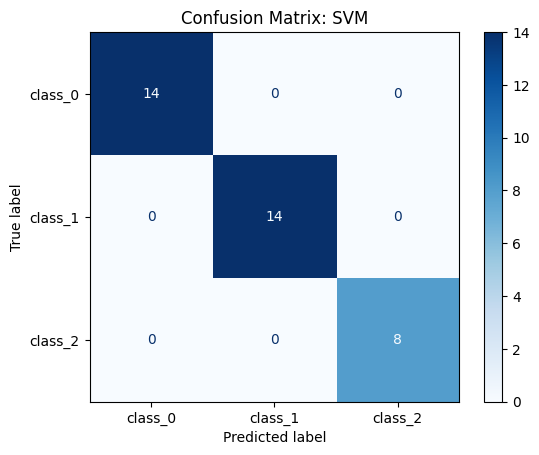

<Figure size 400x400 with 0 Axes>

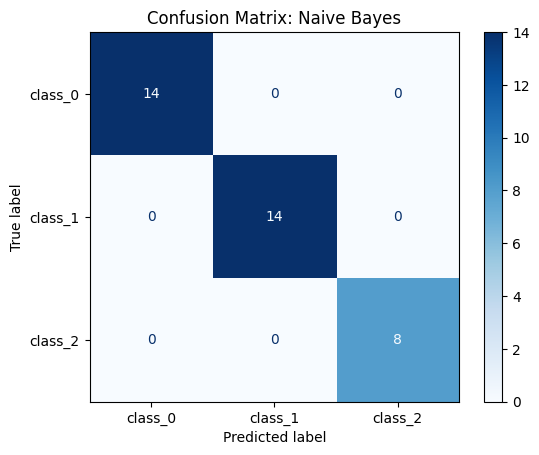

<Figure size 400x400 with 0 Axes>

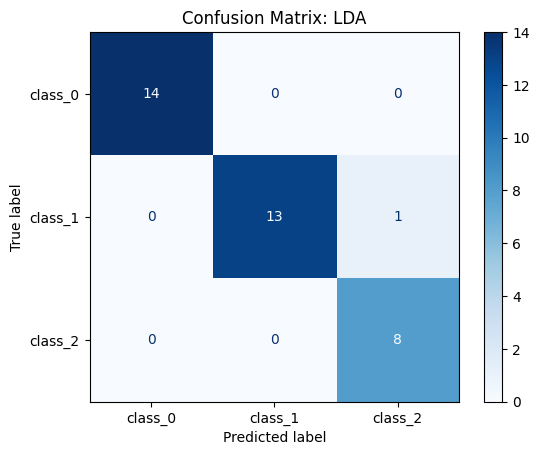

<Figure size 400x400 with 0 Axes>

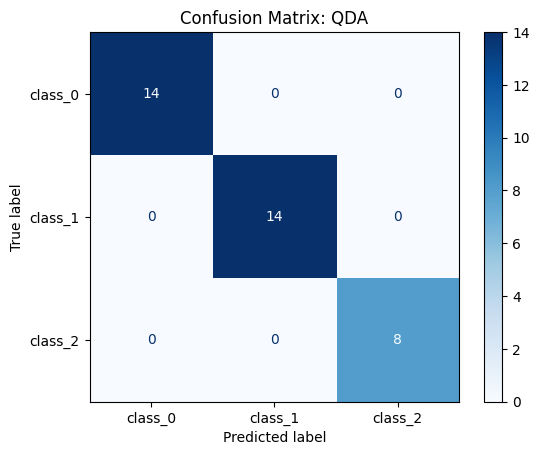

<Figure size 400x400 with 0 Axes>

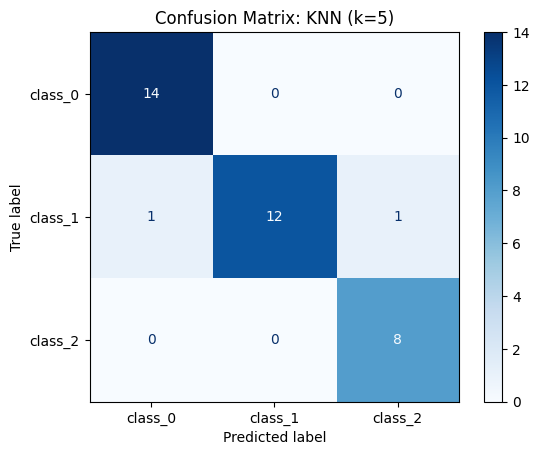

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    plt.figure(figsize=(4, 4))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=wine.target_names, cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.grid(False)
    plt.show()
